In [1]:
import yfinance as yf

In [2]:
ticker = 'BTC-USD'

data = yf.download(ticker, auto_adjust=True, start = '2020-01-01')

[*********************100%%**********************]  1 of 1 completed


In [3]:
import sys
sys.path.append("../")
sys.path.append("../algo_trader")

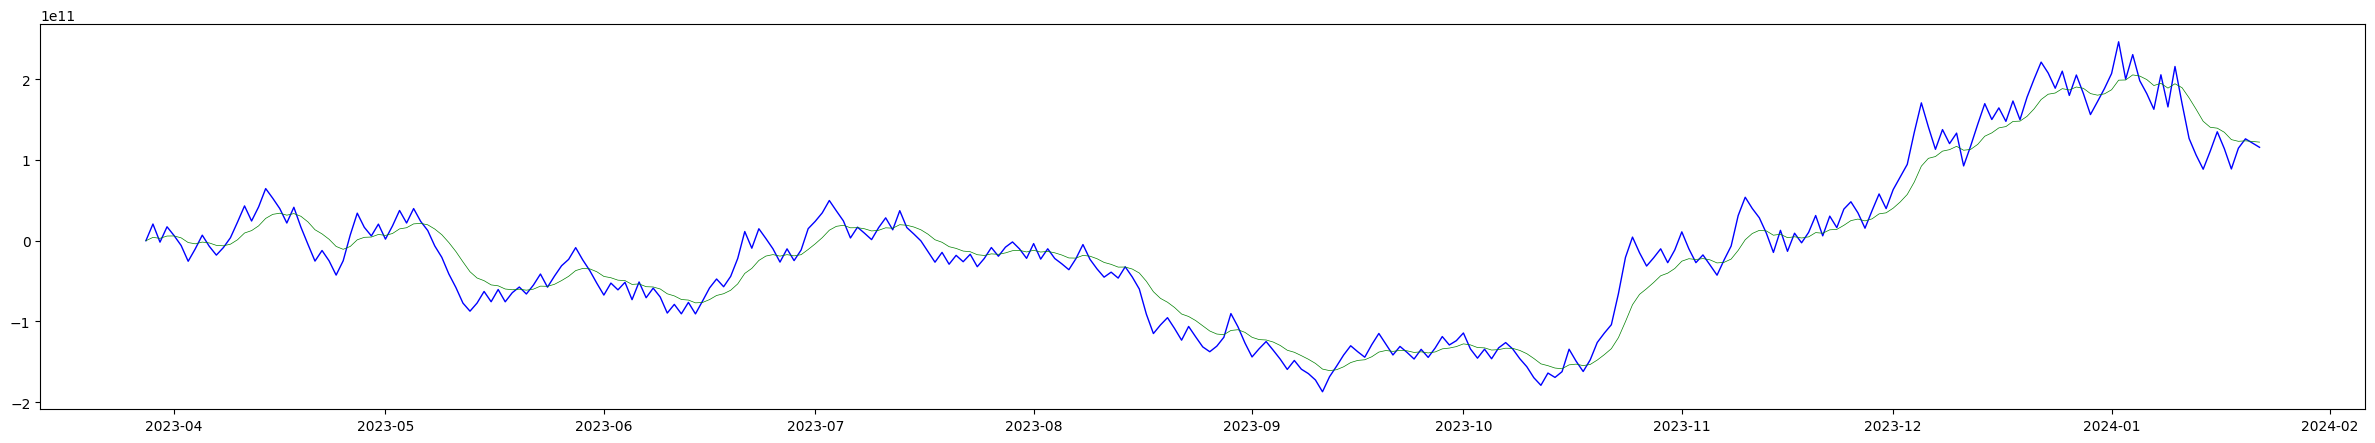

In [4]:
from algo_trader.lib.indicators.obv import OBV

df = data.iloc[-300:]
obv = OBV(9)
obv.calculate(df)
obv.plot()

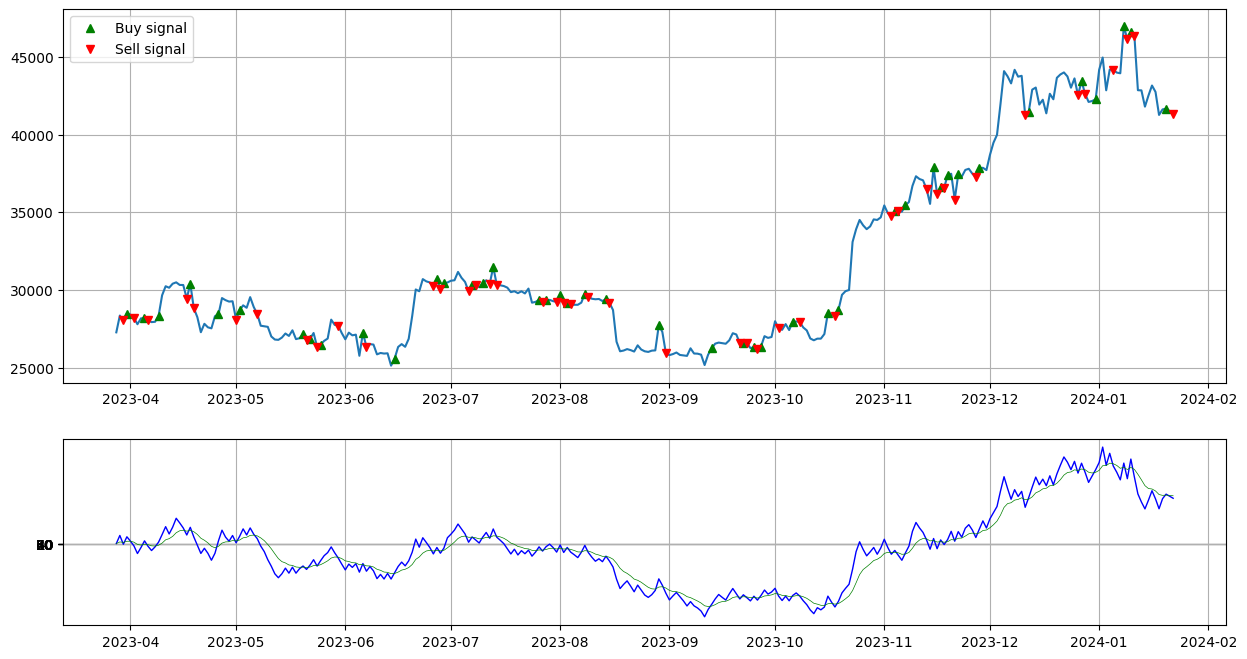

In [5]:
import matplotlib.pyplot as plt

# Armo los dos subgráficos con subplots
# figsize: Es la dimensión de toda la figura, que contiene los subgráficos
# nrows: Es la cantidad de subgráficos
# height_ratios: Se coloca la proporción de alturas entre los subgráficos (la cantidad de elementos debe coincidir con las nrows ingresadas)
fig, ax = plt.subplots(figsize=(15,8), nrows=2, gridspec_kw={'height_ratios' : [2,1]})

obv_df = obv.calculate(df)
obv_df['buy_signal'] = obv.calc_buy_signals()
obv_df['sell_signal'] = obv.calc_sell_signals()
buySignals = obv_df[obv_df['buy_signal'] == True]
sellSignals = obv_df[obv_df['sell_signal'] == True]

ax[0].plot(obv_df.index, obv_df.Close)
ax[0].plot(buySignals.index, buySignals.Close, '^', label='Buy signal', color='green')
ax[0].plot(sellSignals.index, sellSignals.Close, 'v', label='Sell signal', color='red')
ax[0].legend(loc='upper left')
ax[0].grid()

ax[1].set_yticks(range(10,90,10))
ax[1].plot(obv_df.OBV, color='blue', linewidth=1)
ax[1].plot(obv_df.OBV_EMA, color='green', linewidth=0.5)
ax[1].grid()

In [6]:
new_record = data.iloc[-1:]
obv.predict_signal(new_record)

[OBV] Current OBV value: 115727287639.0
[OBV] Current OBV_EMA value: 120883978783.16388
[OBV] Signal: Action.HOLD


<Action.HOLD: 'hold'>